# [Lab 1] Intro to Colab, PyTorch and Neural Nets

## 1.0 Google Colab

Material in this section is based on:
- [Google Colab Free GPU Tutorial](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)
- [Get started with Google Colaboratory (Coding TensorFlow)](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow)

A Colab notebook is a Jupyter notebook stored on Google Drive.

With Google Colab, you can develop deep learning applications on the GPU for free.
Colab connects your code to a cloud-based runtime, meaning you can execute Python code without any required setup on your own machine.

A Colab notebook consists of cells which are executed using that same runtime, resulting in an interactive coding session.
There are also text cells to let you add descriptions around the code.
Text cells are formatted using Markdown.
You can add `Code` and `Text` cells by clicking on their respective buttons in top left of your Colab notebook or between two cells.

Colab notebooks can be shared like a Google Doc by Google Drive sharing (top right of your Colab notebook), or even by exporting your notebook to GitHub (`File > Save a copy in GitHub`).
The notebook is stored in the standard Jupyter Notebook format, and so the notebooks you create can be viewed and executed in Jupyter Notebook and Jupyter Lab.

To learn more about Colab, visit [colab.research.google.com](https://colab.research.google.com/notebooks/intro.ipynb), where you will find links to tutorials about Jupyter and Colab notebooks.

### Getting Google Colab Ready to Use

#### Creating Folder on Google Drive

Since Colab is working on your own Google Drive, you first need to specify its working directory.
If you do not create a Colab notebook inside a specific folder, it will be saved in the default "Colab Notebooks" folder.

You can create a new folder in Google Drive via `Right click > New folder`.

#### Creating New Colab Notebook
Create a new notebook via `Right click > More > Google Colaboratory`

#### Setting Free GPU
It is so simple to alter default hardware (CPU to GPU or vice versa) as:

`Runtime > Change runtime type` and select `GPU` as Hardware accelerator.


https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

#### Running or Importing `.py`/other Files with Google Colab



Run these codes first in order to install the necessary libraries and perform authorization:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Now you can reach you Google Drive with:

In [ ]:
!ls "/content/drive/My Drive/"

You can also upload a file from your local drive with the following code:

In [ ]:
# optionally
from google.colab import files
files.upload()

## 1.1 Intro to PyTorch

Material in this section is based on:
- [What is PyTorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)

PyTorch is a Python-based scientific computing package that replaces NumPy to use the power of GPUs.

In [ ]:
import torch
torch.__version__

'1.7.1'

### Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [ ]:
# Construct a randomly initialized matrix (i.e., a 2-dimensional tensor):


print(x)

In [ ]:
# Construct a tensor directly from data:

print(x)

In [ ]:
# Construct a matrix filled with zeros and of dtype long:

print(x)

In [ ]:
# Get its size:
print()

### Operations

Standard operations are available in PyTorch and multiple syntaxes can be used.

For example, you can perform element-wise addition as follows:

In [ ]:
y = torch.rand(5, 3)
print(x + y)

**Resizing:** If you want to resize/reshape tensor, you can use `torch.view`:

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

You can also add or remove a dimension to/from your tensor at a specified position `dim` via `.unsqueeze(dim)` or `.squeeze(dim)`, respectively:

In [ ]:
a = torch.tensor([1, 2, 3, 4])
print(a.shape, a)
a = a.unsqueeze(0)
print(a.shape, a)
a = a.squeeze(0)
print(a.shape, a)
a = a.unsqueeze(1)
print(a.shape, a)
a = a.squeeze(1)
print(a.shape, a)


#### Exercise 1.1

In various situations, you will need to perform matrix-vector operations (rather than matrix-matrix operations like the ones above).

In this case, using `for` loops might be too slow.
However, similar to NumPy, you can [broadcast](https://pytorch.org/docs/stable/notes/broadcasting.html) variables also in PyTorch.

In [ ]:
# ============================================================================ #
# Ex 1.1
# Create a random y vector and row-wise sum it to `x` by broadcasting
# ============================================================================ #

y = None

print(x + y)  # Broadcast sum (row-wise)

### PyTorch <--> NumPy

The PyTorch Tensor and NumPy array will share their underlying memory locations (if the PyTorch Tensor is on CPU), and changing one will change the other.

In [ ]:
import numpy as np

In [ ]:
# PyTorch -> NumPy
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

In [ ]:
a.add_(1)  # in-place addition
print(a)
print(b)

In [ ]:
# NumPy -> PyTorch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

### CUDA tensors

Tensors can be moved onto any device using the `.to()` method.

In [ ]:
# This cell is run only if CUDA is available
# `torch.device` is used to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use `.to("cuda")`
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # `.to` can also change dtype

## 1.2 Neural Networks

Material in this section is based on:
- [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
- [yunjey/pytorch-tutorial/pytorch-tutorial/tutorials/01-basics/pytorch_basics](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py)
- https://www.cs.toronto.edu/~lczhang/360/lec/w03/nn.html
- [PyTorch Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

### Autograd

While PyTorch and NumPy have similar semantics, NumPy is a generic framework for scientific computing that does not know anything about computational graphs, deep learning, or gradients.

In order to train neural networks, we almost always use gradient-based optimization methods.
However, for a composite function, like a neural network, it might be time-consuming to derive gradients by hand.
This problem is solved by **backpropagation**: an algorithm to compute the gradients of virtually any model efficiently.

Nonetheless, manually implementing the backward pass to perform backpropagation can quickly get very hairy for large complex networks.
Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks.
The **autograd** package in PyTorch provides exactly this functionality.
When using autograd, the forward pass of your network will define a **computational graph**: nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors.
Backpropagating through this graph then allows you to easily compute gradients.

While this sounds complicated, it is pretty simple to use in practice.
Each PyTorch Tensor represents a node in a computational graph.
If `x` is a Tensor that has `x.requires_grad=True` then `x.grad` is another Tensor holding the gradient of `x` with respect to some scalar value (e.g., a loss).

In practice, `l.backward()` is used to compute the backward pass with respect to a scalar loss `l` by **autograd**.
This call computes the gradient of the loss `l` with respect to all Tensors `x` with `x.requires_grad=True`.
After this call, `x.grad` will be a Tensor holding the gradient of the loss with respect to `x`.

In [ ]:
# ============================================================================ #
#                                Autograd example                              #
# ============================================================================ #

# Create tensors
x = torch.tensor(1.)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
criterion = torch.nn.MSELoss()

# Build a computational graph
pred = (w * x + b).repeat([3])    # h = [2 * x + 3, 2 * x + 3, 2* x + 3]
print(pred)
pred = torch.sum(pred)
loss = criterion(pred, torch.tensor(5.0))
print(loss)

# Compute gradients wrt y (d*/dy)
pred.retain_grad()
loss.backward()
# Print out the gradients
print(x.grad)
print(w.grad)
print(b.grad)
print(pred.grad)

tensor([5., 5., 5.], grad_fn=<RepeatBackward>)
tensor(100., grad_fn=<MseLossBackward>)
None
tensor(60.)
tensor(60.)
tensor(20.)


### Optimization

The `optim` package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms, such as SGD, Adam, AdaGrad, etc.

In this example, you will use the `nn` package (see next section for more information) to define a linear model and you will then perform one step of optimization using the SGD algorithm provided by the `optim` package:

<div>
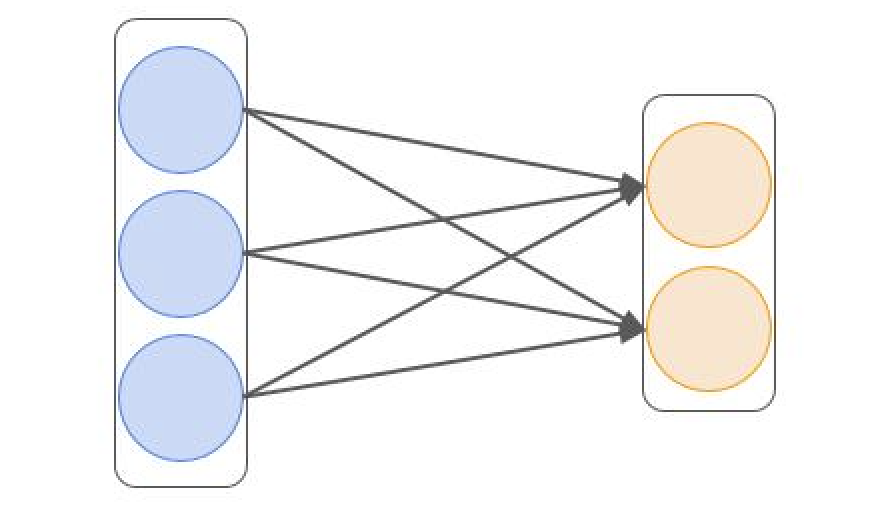
</div>

In [ ]:
# ============================================================================ #
#                                 Optim example                                #
# ============================================================================ #

# Hyperparameters: N is the batch size; D_in is the input dimension; D_out is
# the output dimension
N, D_in, D_out = 10, 3, 2

# Create Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Build a fully connected layer
model = torch.nn.Linear(3, 2)
print('w: ', model.weight)
print('b: ', model.bias)

# Build loss function: The nn package also contains definitions of popular loss
# functions. Here, we will use Mean Squared Error (MSE) as our loss function
criterion = torch.nn.MSELoss()

# Build the optimizer: Use the optim package to define an Optimizer that will
# update the weights of the model for us. Here, we will use SGD. The first
# argument to the constructor tells the optimizer which Tensors it should update
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Forward pass: Compute predicted y by passing x to the model. You pass a Tensor
# of input data to the Module and it produces a Tensor of output data
pred = model(x)

# Compute loss: A loss function takes the (output, target) pair of inputs, and
# computes a value that estimates how far away the output is from the target
loss = criterion(pred, y)
print('loss before any optimization step: ', loss.item())

# Before the backward pass, use the optimizer object to zero all of the
# gradients for the variables it will update (which are the learnable
# weights of the model). This is because by default, gradients are
# accumulated in buffers(i.e., not overwritten) whenever `.backward()`
# is called. Checkout docs of torch.autograd.backward for more details
optimizer.zero_grad()

# Backward pass: Compute gradient of the loss with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with `requires_grad=True`, so this call will compute gradients for
# all learnable parameters in the model
loss.backward()

# Print out the gradients
print ('dL/dw: ', model.weight.grad)
print ('dL/db: ', model.bias.grad)

# 1-step gradient descent: Calling the step function on an Optimizer makes an
# update to its parameters
optimizer.step()

# Print out the loss after 1-step gradient descent
pred = model(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

### `nn` module

When building neural networks, we frequently think of arranging the computation into **layers**, some of which have **learnable parameters** which will be optimized during training.


In PyTorch, the `nn` package defines a set of **Modules**, which are roughly equivalent to neural network layers.
A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters.   
The [`functional`](https://pytorch.org/docs/stable/nn.functional.html) package inside `nn` comes with several useful operations like activation, normalization functions, and dropout among others.

In the following example, you will use the [`nn.Linear`](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) Module to implement a two-layer feed-forward network:



<div>
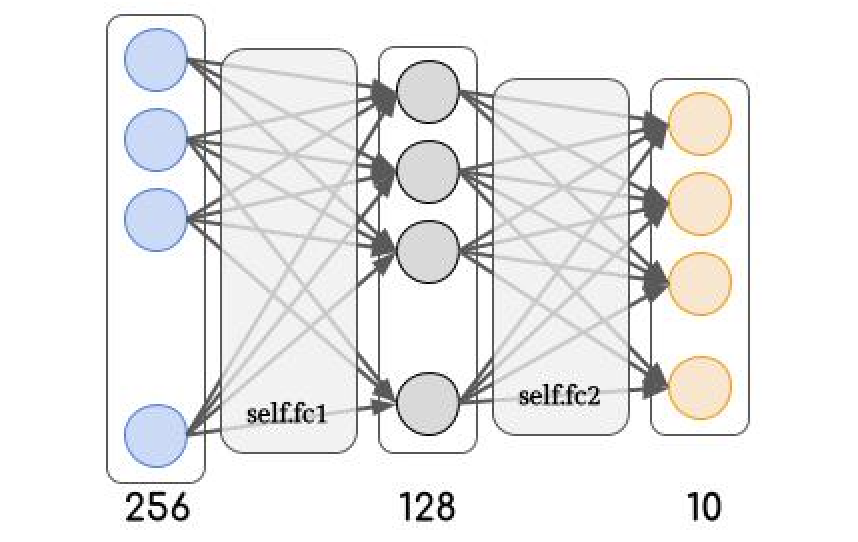
</div>

In [ ]:
# ============================================================================ #
#                              nn.Module example                               #
# ============================================================================ #

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # nn.Linear: an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
print(net)

All models in PyTorch inherit from the subclass `nn.Module`, which has useful methods like `parameters()`, `__call__` and others.

The `__init__` method is where we typically define the attributes of a class.
In PyTorch, all the "sub-layers" of our model should be defined here, along with any other setting that we wish to save (for example, model's attributes such as `self.num_hidden`).
That is, in the `__init__` method, we define the components of our computational graph but we don't connect them together.
This is done in the `forward` method.

The `forward` method is called when we use the neural network to make a prediction (i.e., running the forward pass).
The forward method is called from the `__call__` function of `nn.Module`, so that when we run `model(input)`, the forward method is called.
Here, we define the sequence of operations/sub-layers the input Tensor undergoes to generate an output prediction.

### Exercise 1.2
If you have prior experience with the [Keras](https://keras.io/) deep learning library, you may be more comfortable with an alternative way of defining your model via [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).
With the `Sequential` container, you can simply pass, as arguments, several PyTorch Modules (each layer is a Module itself) which will be used one after the other to define construct your network.
In this case, you do not need to define a separate forward function.

In [ ]:
# ============================================================================ #
# Ex 1.2
# Create the same in network in `nn.Module example` using `nn.Sequential`
# ============================================================================ #

import torch
import torch.nn as nn
import torch.nn.functional as F

seq_net = None

print(seq_net)


The learnable parameters of a model are returned by `net.parameters()`:

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # fc1's .weight

Let’s try a random 256 input:

In [ ]:
# Forward pass
input = # TODO
out = # TODO
print(out)

## 1.3 Sentiment Classification with `torchtext`

Material in this section is based on:
- [Text Classification with torchtext](https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html)
- [A Comprehensive Introduction to Torchtext (Practical Torchtext part 1)](https://mlexplained.com/2018/02/08/a-comprehensive-tutorial-to-torchtext/)

The `torchtext` package consists of data processing utilities and popular datasets for natural language.

You will, in particular, make use of the [`torchtext.data`](https://pytorch.org/text/data.html) module that provides the following:
- Ability to define a preprocessing pipeline
- Batching, padding, and numericalizing (including building a vocabulary object)
- Wrapper for dataset splits (train, validation, test)

In this section, you will see how to train a supervised learning algorithm for classification using one `TextClassification` dataset.
In particular, you will use the [Stanford Sentiment Treebank](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf) (SST) to tackle the task of sentiment analysis.

In [ ]:
import torch
import torchtext
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Data

`torchtext` takes in raw data in the form of text files and converts them to **Datasets**.
Datasets are simply preprocessed blocks of data read into memory with various fields.
They are a canonical form of processed data that other data structures can use.

`torchtext` then passes the Dataset to an **Iterator**.
Iterators handle numericalizing, batching, packaging, and moving the data to the GPU.
Basically, it does all the heavy lifting necessary to pass the data to a neural network for you!

In [ ]:
# Set up torchtext fields: you tell torchtext how you want the data to look like
# and torchtext handles it for you. The way you do this is by declaring a Field.
# We tell it to convert the input to lowercase, and also tell it that the
# input is sequential. We also pass it a maximum length argument that will pad
# every sequence up to that length
MAXLEN = 60
TEXT = torchtext.data.Field(sequential=True, lower=True, fix_length=MAXLEN, batch_first=True)
LABEL = torchtext.data.Field(sequential=False)

# Read splits for data
train, valid, test = torchtext.datasets.SST.splits(TEXT, LABEL)
print(len(train), len(valid), len(test))

# Build the vocabulary: Map words to integers. The full range of words it should
# handle (the vocabulary) is from the training set only. You can also load
# pre-trained word embeddings for the words in your vocabulary by using the
# `vectors` argument of `build_vocab()`
# [WARNING: IT TAKES 5-10 MINS TO DOWNLOAD GLOVE VECTORS]
TEXT.build_vocab(train, vectors=torchtext.vocab.GloVe(name='6B', dim=300))
LABEL.build_vocab(train)
print(len(TEXT.vocab), len(LABEL.vocab))

# Make iterator for splits: Iterators are the torchtext equivalent of default
# PyTorch's DataLoaders. However, as you will see in later labs, Iterators also
# offer some convenient functionality that is unique to NLP (e.g., the
# `sort_within_batch` argument)
BATCH_SIZE = 16
train_iter, valid_iter, test_iter = \
  torchtext.data.BucketIterator.splits((train, valid, test),
                                       batch_size=BATCH_SIZE, device=device)
print(len(train_iter), len(valid_iter), len(test_iter))

In [ ]:
# Example of a data point (TEXT, LABEL)
batch = next(iter(train_iter))
print(batch.text[0])
print(batch.label[0])

### Model

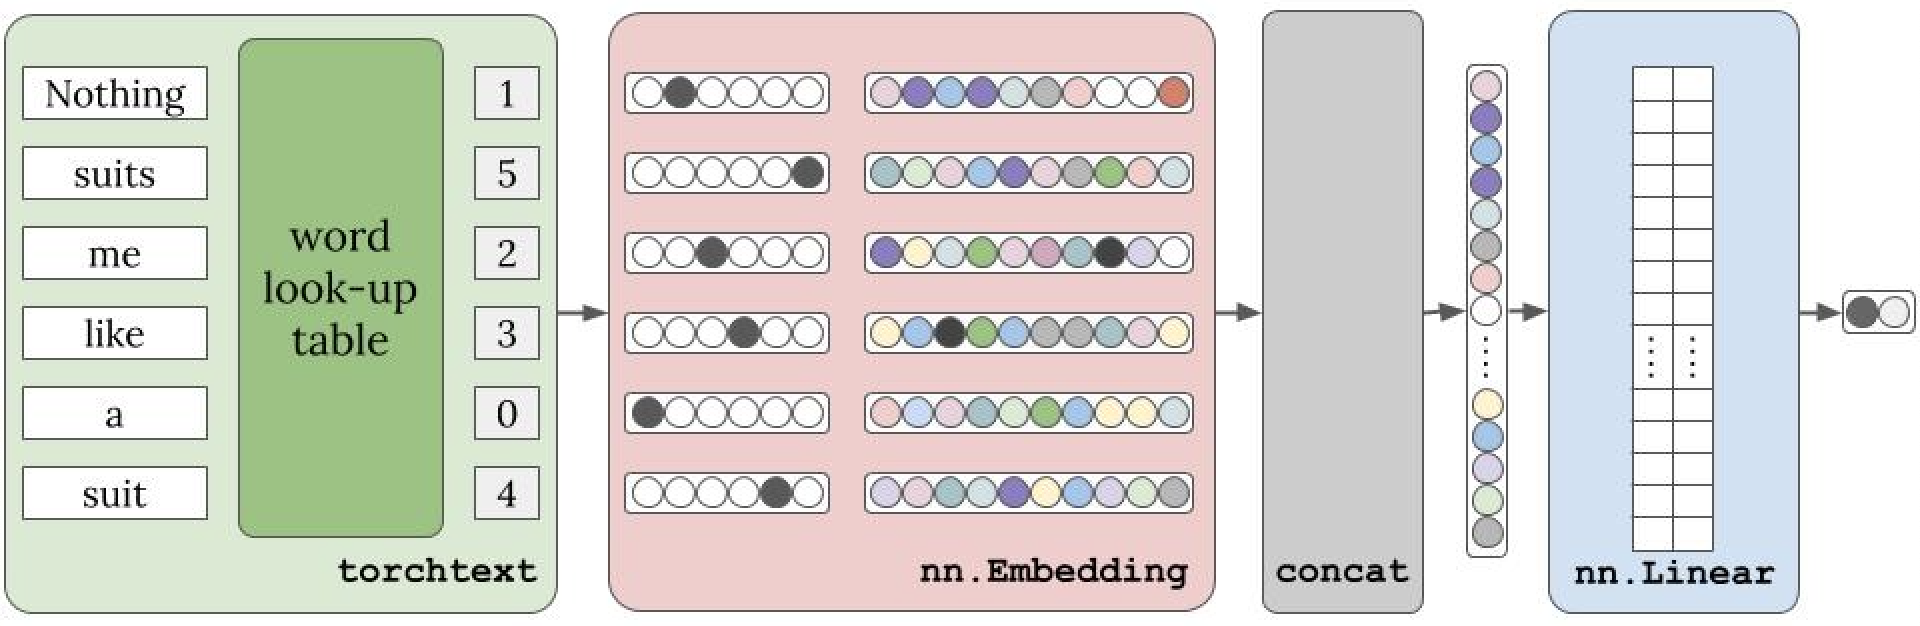

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class TextSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class, max_len):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Linear(embed_dim*max_len, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.05
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text):
        word_embeddings = self.embedding(text)
        # Concatenate word embeddings to create sentence embeddings
        sent_embeddings = word_embeddings.view(word_embeddings.size(0), -1)
        return self.fc(sent_embeddings)

### Train and Test Functions

In [ ]:
def train_func(train_iter):
    # Train the model for one epoch

    # Reset the loss values and set the model into training mode
    train_loss = 0
    train_acc = 0
    model.train()
    for i, batch in enumerate(train_iter):
        # For each batch

        # Get input indices and output label


        # Forward pass


        # Compute loss


        # Do one step of optimization


        # Compute accuracy


    return train_loss / (len(train_iter)*BATCH_SIZE), train_acc / (len(train_iter)*BATCH_SIZE)


def eval_func(eval_iter):
    # Evaluate the model (for one epoch)

    # Reset the loss values and set the model into evaluation mode
    loss = 0
    acc = 0
    model.eval()
    for batch in eval_iter:
        # For each batch

        # Get input indices and output label


        # Set `no_grad` mode to avoid computing the gradients during evaluation
        with torch.no_grad():
            # Forward pass


            # Compute loss and accuracy


    return loss / (len(eval_iter)*BATCH_SIZE), acc / (len(eval_iter)*BATCH_SIZE)

In [ ]:
import time

# Hyperparameters
VOCAB_SIZE = len(TEXT.vocab)
NUM_CLASS = len(LABEL.vocab)
EMBED_DIM = 32
N_EPOCHS = 5
LR = 5e-5

# Define model, loss function, optimizer and LR scheduler
model = TextSentiment(VOCAB_SIZE, EMBED_DIM, NUM_CLASS, MAXLEN).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

min_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train_func(train_iter)
    valid_loss, valid_acc = eval_func(valid_iter)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60

    print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')

In [ ]:
print('Checking the results of test dataset...')
test_loss, test_acc = eval_func(test_iter)
print(f'\tLoss: {test_loss:.4f}(test)\t|\tAcc: {test_acc * 100:.1f}%(test)')

### Exercise 1.3

A good hyperparameter choice is often fundamental to achieve the best performance out of your model.
Experiment with different hyperparameters and then evaluate the best one on the `test` split.

In [ ]:
# ============================================================================ #
# Ex 1.3
# Improve the performance of the previous model via hyperparameter tuning
# ============================================================================ #

import time

# Hyperparameters
VOCAB_SIZE = len(TEXT.vocab)
NUM_CLASS = len(LABEL.vocab)
EMBED_DIM = 32
N_EPOCHS = 5
LR = 5e-5

# Define model, loss function, optimizer and LR scheduler
model = TextSentiment(VOCAB_SIZE, EMBED_DIM, NUM_CLASS, MAXLEN).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

min_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train_func(train_iter)
    valid_loss, valid_acc = eval_func(valid_iter)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60

    print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')

In [ ]:
print('Checking the results of test dataset...')
test_loss, test_acc = eval_func(test_iter)
print(f'\tLoss: {test_loss:.4f}(test)\t|\tAcc: {test_acc * 100:.1f}%(test)')

### Exercise 1.4

Pre-trained word embeddings have been proven very useful in NLP.
You downloaded GloVe word embeddings when creating your `torchtext` vocabulary.
Modify your `TextSentiment` model to use GloVe embeddings.
You should observe an average validation accuracy larger than 50% with the given hyperparameters.

In [ ]:
# ============================================================================ #
# Ex 1.4
# Improve the performance of the previous model via pre-trained embeddings
# ============================================================================ #

class GloveTextSentiment(nn.Module):
    pass


In [ ]:
import time

# Hyperparameters
N_EPOCHS = 5
LR = 1e-1

# Define model, loss function, optimizer and LR scheduler
model = None
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

min_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train_func(train_iter)
    valid_loss, valid_acc = eval_func(valid_iter)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60

    print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')

In [ ]:
print('Checking the results of test dataset...')
test_loss, test_acc = eval_func(test_iter)
print(f'\tLoss: {test_loss:.4f}(test)\t|\tAcc: {test_acc * 100:.1f}%(test)')

## 1.4 Debugging

Material in this section is based on:
- [5 Ways of Debugging with IPython](https://switowski.com/blog/ipython-debugging)
- [Python Debugging With Pdb](https://realpython.com/python-debugging-pdb/)

As your models become more and more complex, it is fundamental to being able to quickly find bugs in your code.
`pdb` is a tool that allows you to do interactive debugging in Python (including on Colab notebooks).
It adds a breakpoint in your code and allows you to see what’s going on at a given line.


You can execute the next line by calling the `next` command (or just `n`), step inside the function with `step` (or `s`), continue until the next breakpoint with `continue` (or `c`), display where you are in the code with `l` or `ll`, etc.

If you are new to these CLI debuggers, the [Python Debugging With Pdb](https://realpython.com/python-debugging-pdb/) tutorial is a good resource to learn how to use them.


### Exercise 1.5

In the following code cell, we provide you an implementation for the following model:
> In our model, textual tokens are mapped onto a 32-dimensional space, before being concatenated and fed into a two-layer fully connected network with a ReLU activation in between. Tensors in the hidden layer are 16-dimensional

However, there are 4 bugs in our implementation. Use the interactive debugger to find them!

In [ ]:
# ============================================================================ #
# Ex 1.5
# Fix four bugs in this snippet
# ============================================================================ #

import time
import torch
import torch.nn as nn
import torch.nn.functional as F

from pdb import set_trace


class Net(nn.Module):
    def __init__(self, vocab_size, dims, num_class, max_len):
        super(Net, self).__init__()
        self.embedding = nn.Embedding(vocab_size, max_len*dims[0])
        self.fc1 = nn.Linear(dims[0], dims[1])
        self.fc2 = nn.Linear(dims[1], num_class)

        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc1.weight.data.uniform_(-initrange, initrange)
        self.fc1.bias.data.fill_(1)
        self.fc2.weight.data.uniform_(-initrange, initrange)
        self.fc2.bias.data.fill_(0)

    def forward(self, x):
        # set_trace()            # -- the debugger sets a breakpoint here --
        x = self.embedding(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


# Hyperparameters
VOCAB_SIZE = len(TEXT.vocab)
NUM_CLASS = len(LABEL.vocab)
DIMS = [32, 32]
N_EPOCHS = 5
LR = 1e-4

# Define model, loss function, optimizer and LR scheduler
model = Net(VOCAB_SIZE, DIMS, NUM_CLASS, MAXLEN).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

min_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc = train_func(train_iter)
    valid_loss, valid_acc = test(valid_iter)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60

    print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')

In [ ]:
print('Checking the results of test dataset...')
test_loss, test_acc = eval_func(test_iter)
print(f'\tLoss: {test_loss:.4f}(test)\t|\tAcc: {test_acc * 100:.1f}%(test)')